<a href="https://www.kaggle.com/code/nitishmamadgi/customer-churn?scriptVersionId=155040810" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<!DOCTYPE html>
<html>
<head>
  <title>Telecom Customer Churn ML Project</title>
</head>
<body>
  <h1>Telecom Customer Churn Prediction</h1>
  
  <h2>Introduction</h2>
  <p>In this project, we'll be working with a dataset that contains various features of telecom customers, such as their gender, tenure, services subscribed, contract details, and more. Our goal is to build a machine learning model that can predict whether a customer is likely to churn or not.</p>
  
  <h2>Dataset</h2>
  <p>We have a dataset with 7043 entries and 21 columns. The dataset includes information about each customer's demographics, services, billing, and churn status. The target variable, 'Churn', indicates whether the customer has churned (Yes) or not (No).</p>
  
  <h2>Objective</h2>
  <p>The main objective of this project is to develop a predictive model that can help the telecom company identify customers who are likely to churn. By proactively identifying such customers, the company can take appropriate measures to retain them and reduce churn rates, ultimately improving customer satisfaction and business profitability.</p>
  
  <h2>Steps to be Followed</h2>
  <p>Throughout the project, we'll follow these steps:</p>
  <ol>
    <li>Data Exploration</li>
    <li>Data Preprocessing</li>
    <li>Feature Selection</li>
    <li>Model Selection</li>
    <li>Model Training and Evaluation</li>
    <li>Model Comparison</li>
    <li>Conclusion</li>
  </ol>
  
  <h2>Machine Learning Models</h2>
  <p>For this project, we will consider the following five machine learning algorithms:</p>
  <ul>
    <li>Logistic Regression</li>
    <li>Random Forest Classifier</li>
    <li>Gradient Boosting Classifier</li>
    <li>Support Vector Machine (SVM)</li>
    <li>K-Nearest Neighbors (KNN)</li>
  </ul>
  
</body>
</html>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

## EDA

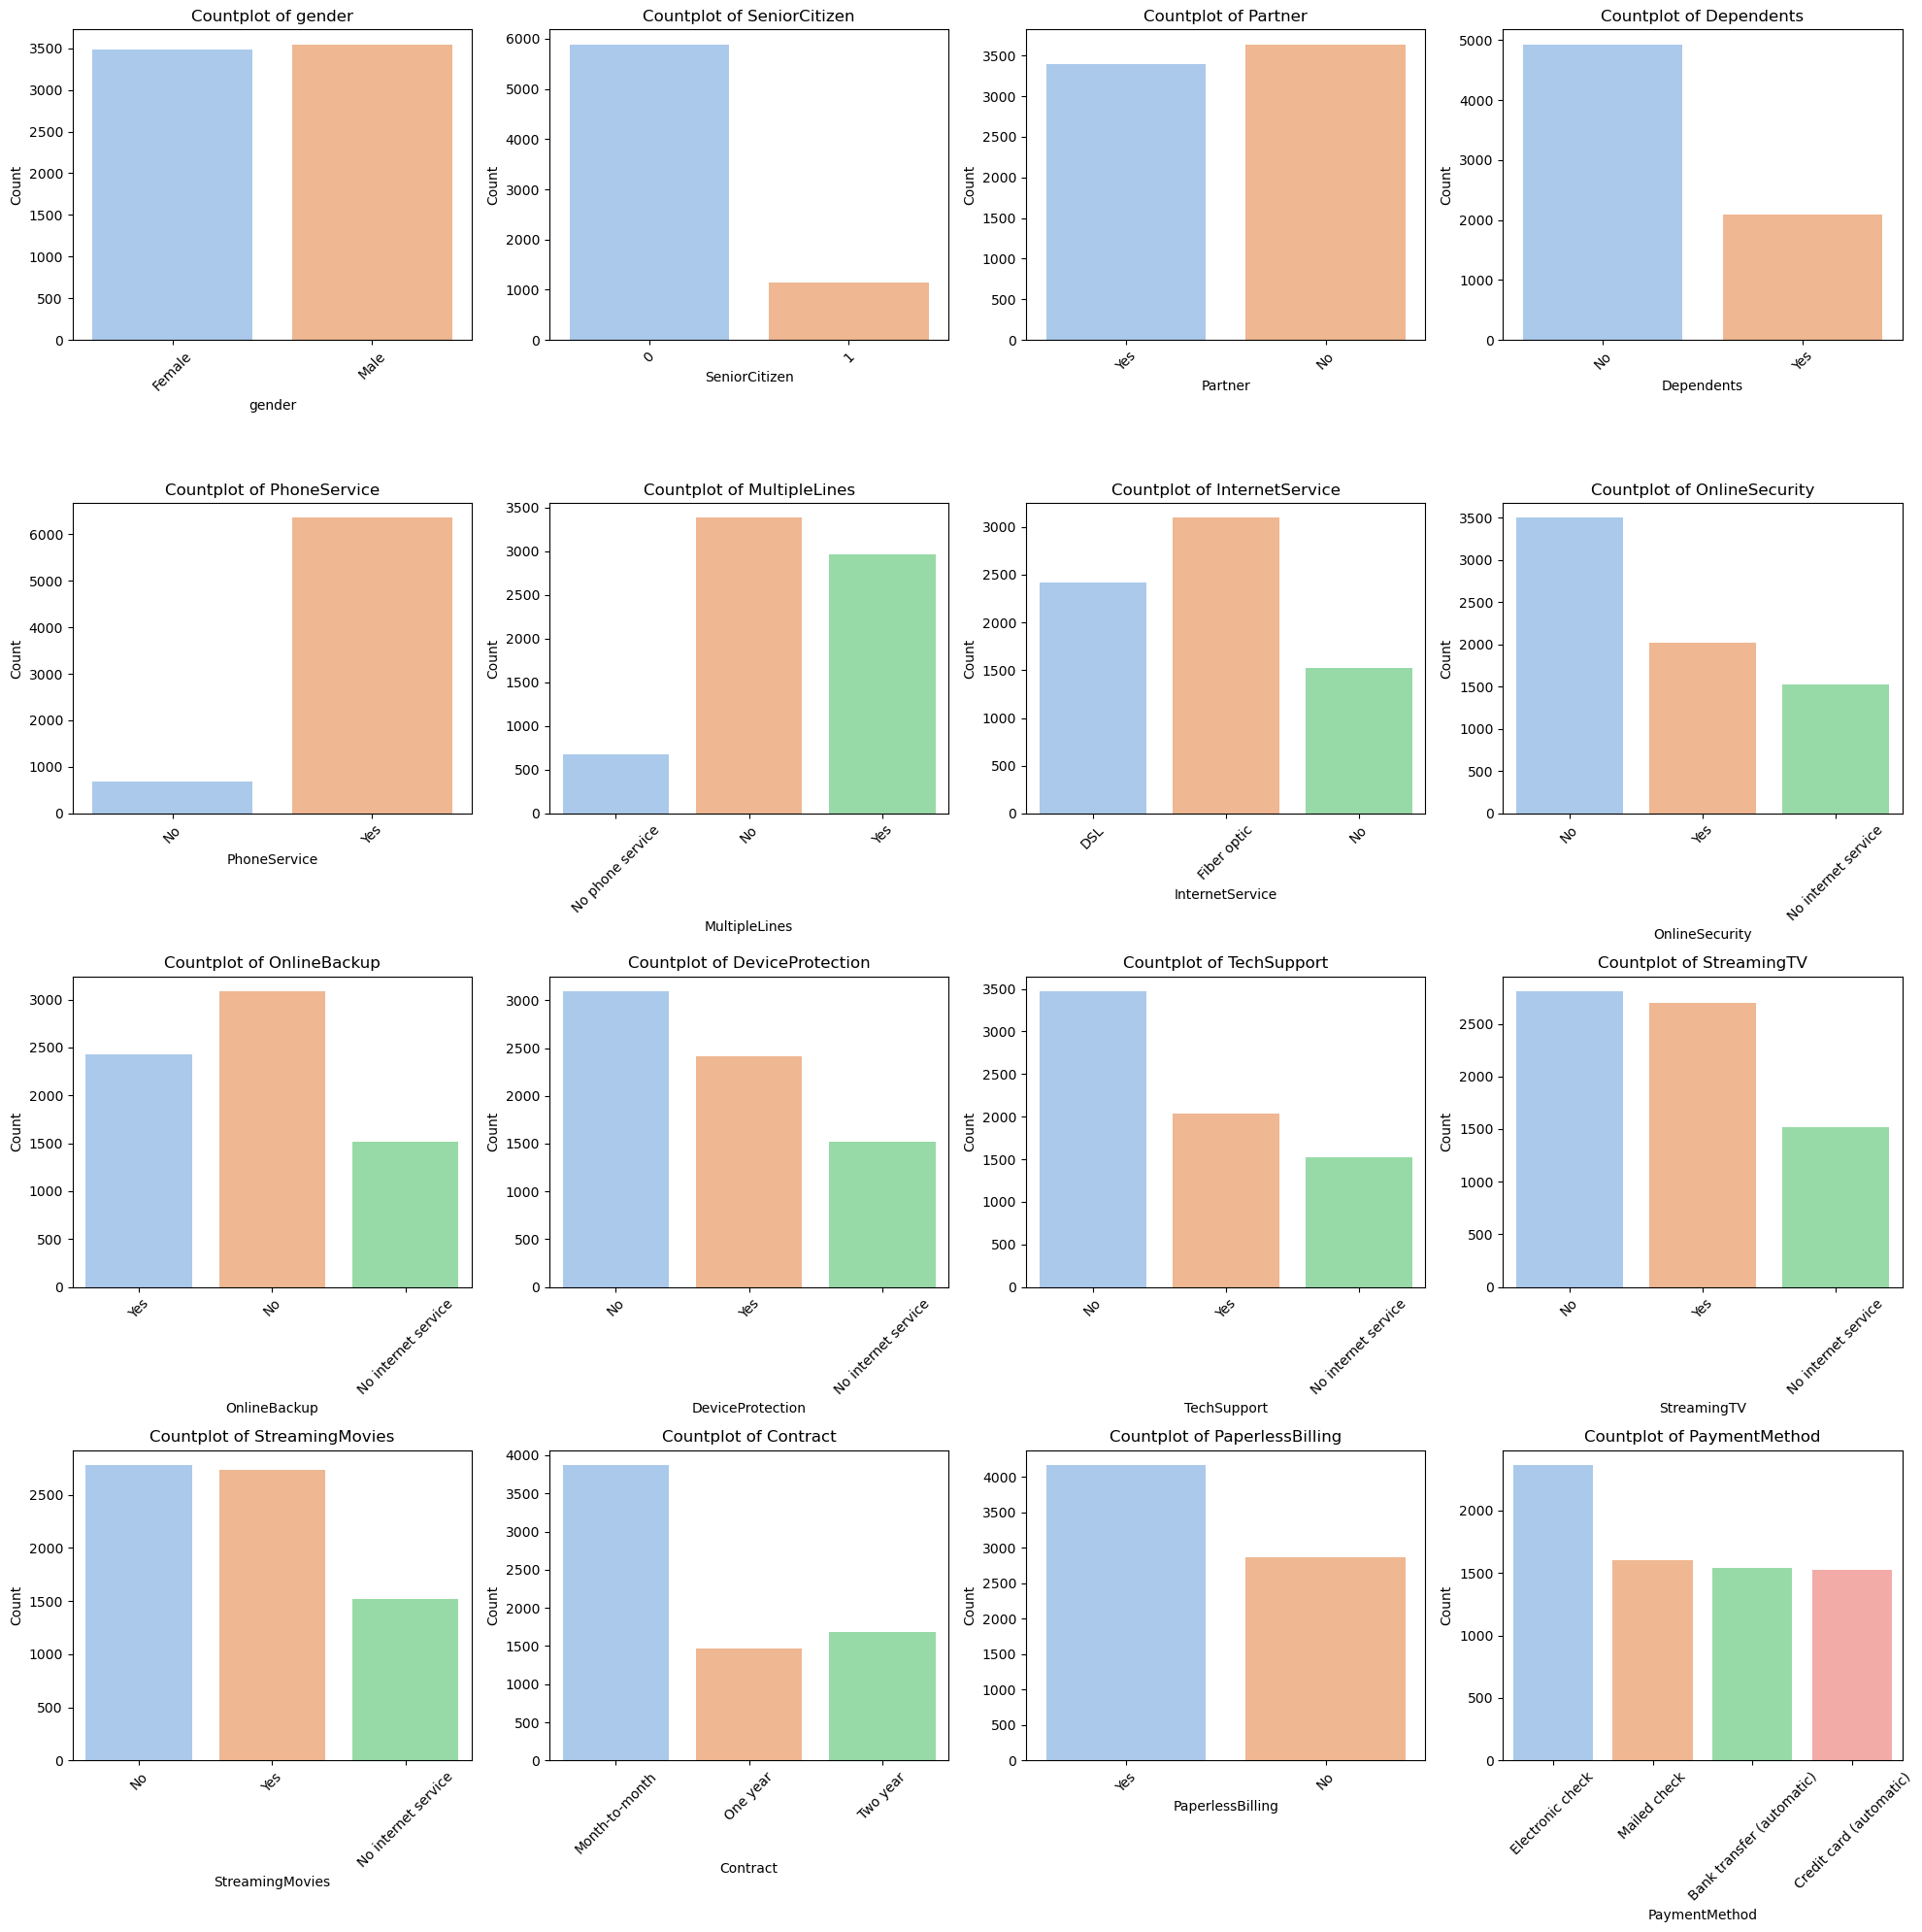

In [10]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4,4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


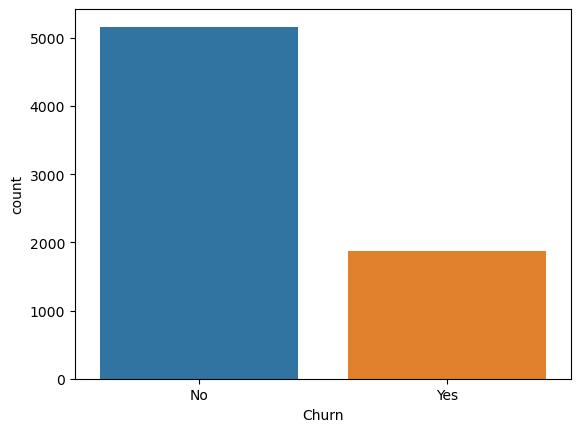

In [12]:
sns.countplot(x='Churn', data = df)
plt.show()

In [13]:
churn_value_counts = df['Churn'].value_counts()
churn_percentage = (df['Churn'].value_counts() / len(df)) * 100

print("Value Counts for 'Churn' class:")
print(churn_value_counts)
print("\nPercentage for 'Churn' class:")
print(churn_percentage)

Value Counts for 'Churn' class:
No     5163
Yes    1869
Name: Churn, dtype: int64

Percentage for 'Churn' class:
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


The class distribution is imbalanced with approximately 73.46% of the data belonging to the 'No' class and only about 26.54% belonging to the 'Yes' class. Such class imbalances can lead to biased model performance, where the model may become overly biased towards predicting the majority class, resulting in poor performance on the minority class.

How do different features relate to the 'Churn' rate?

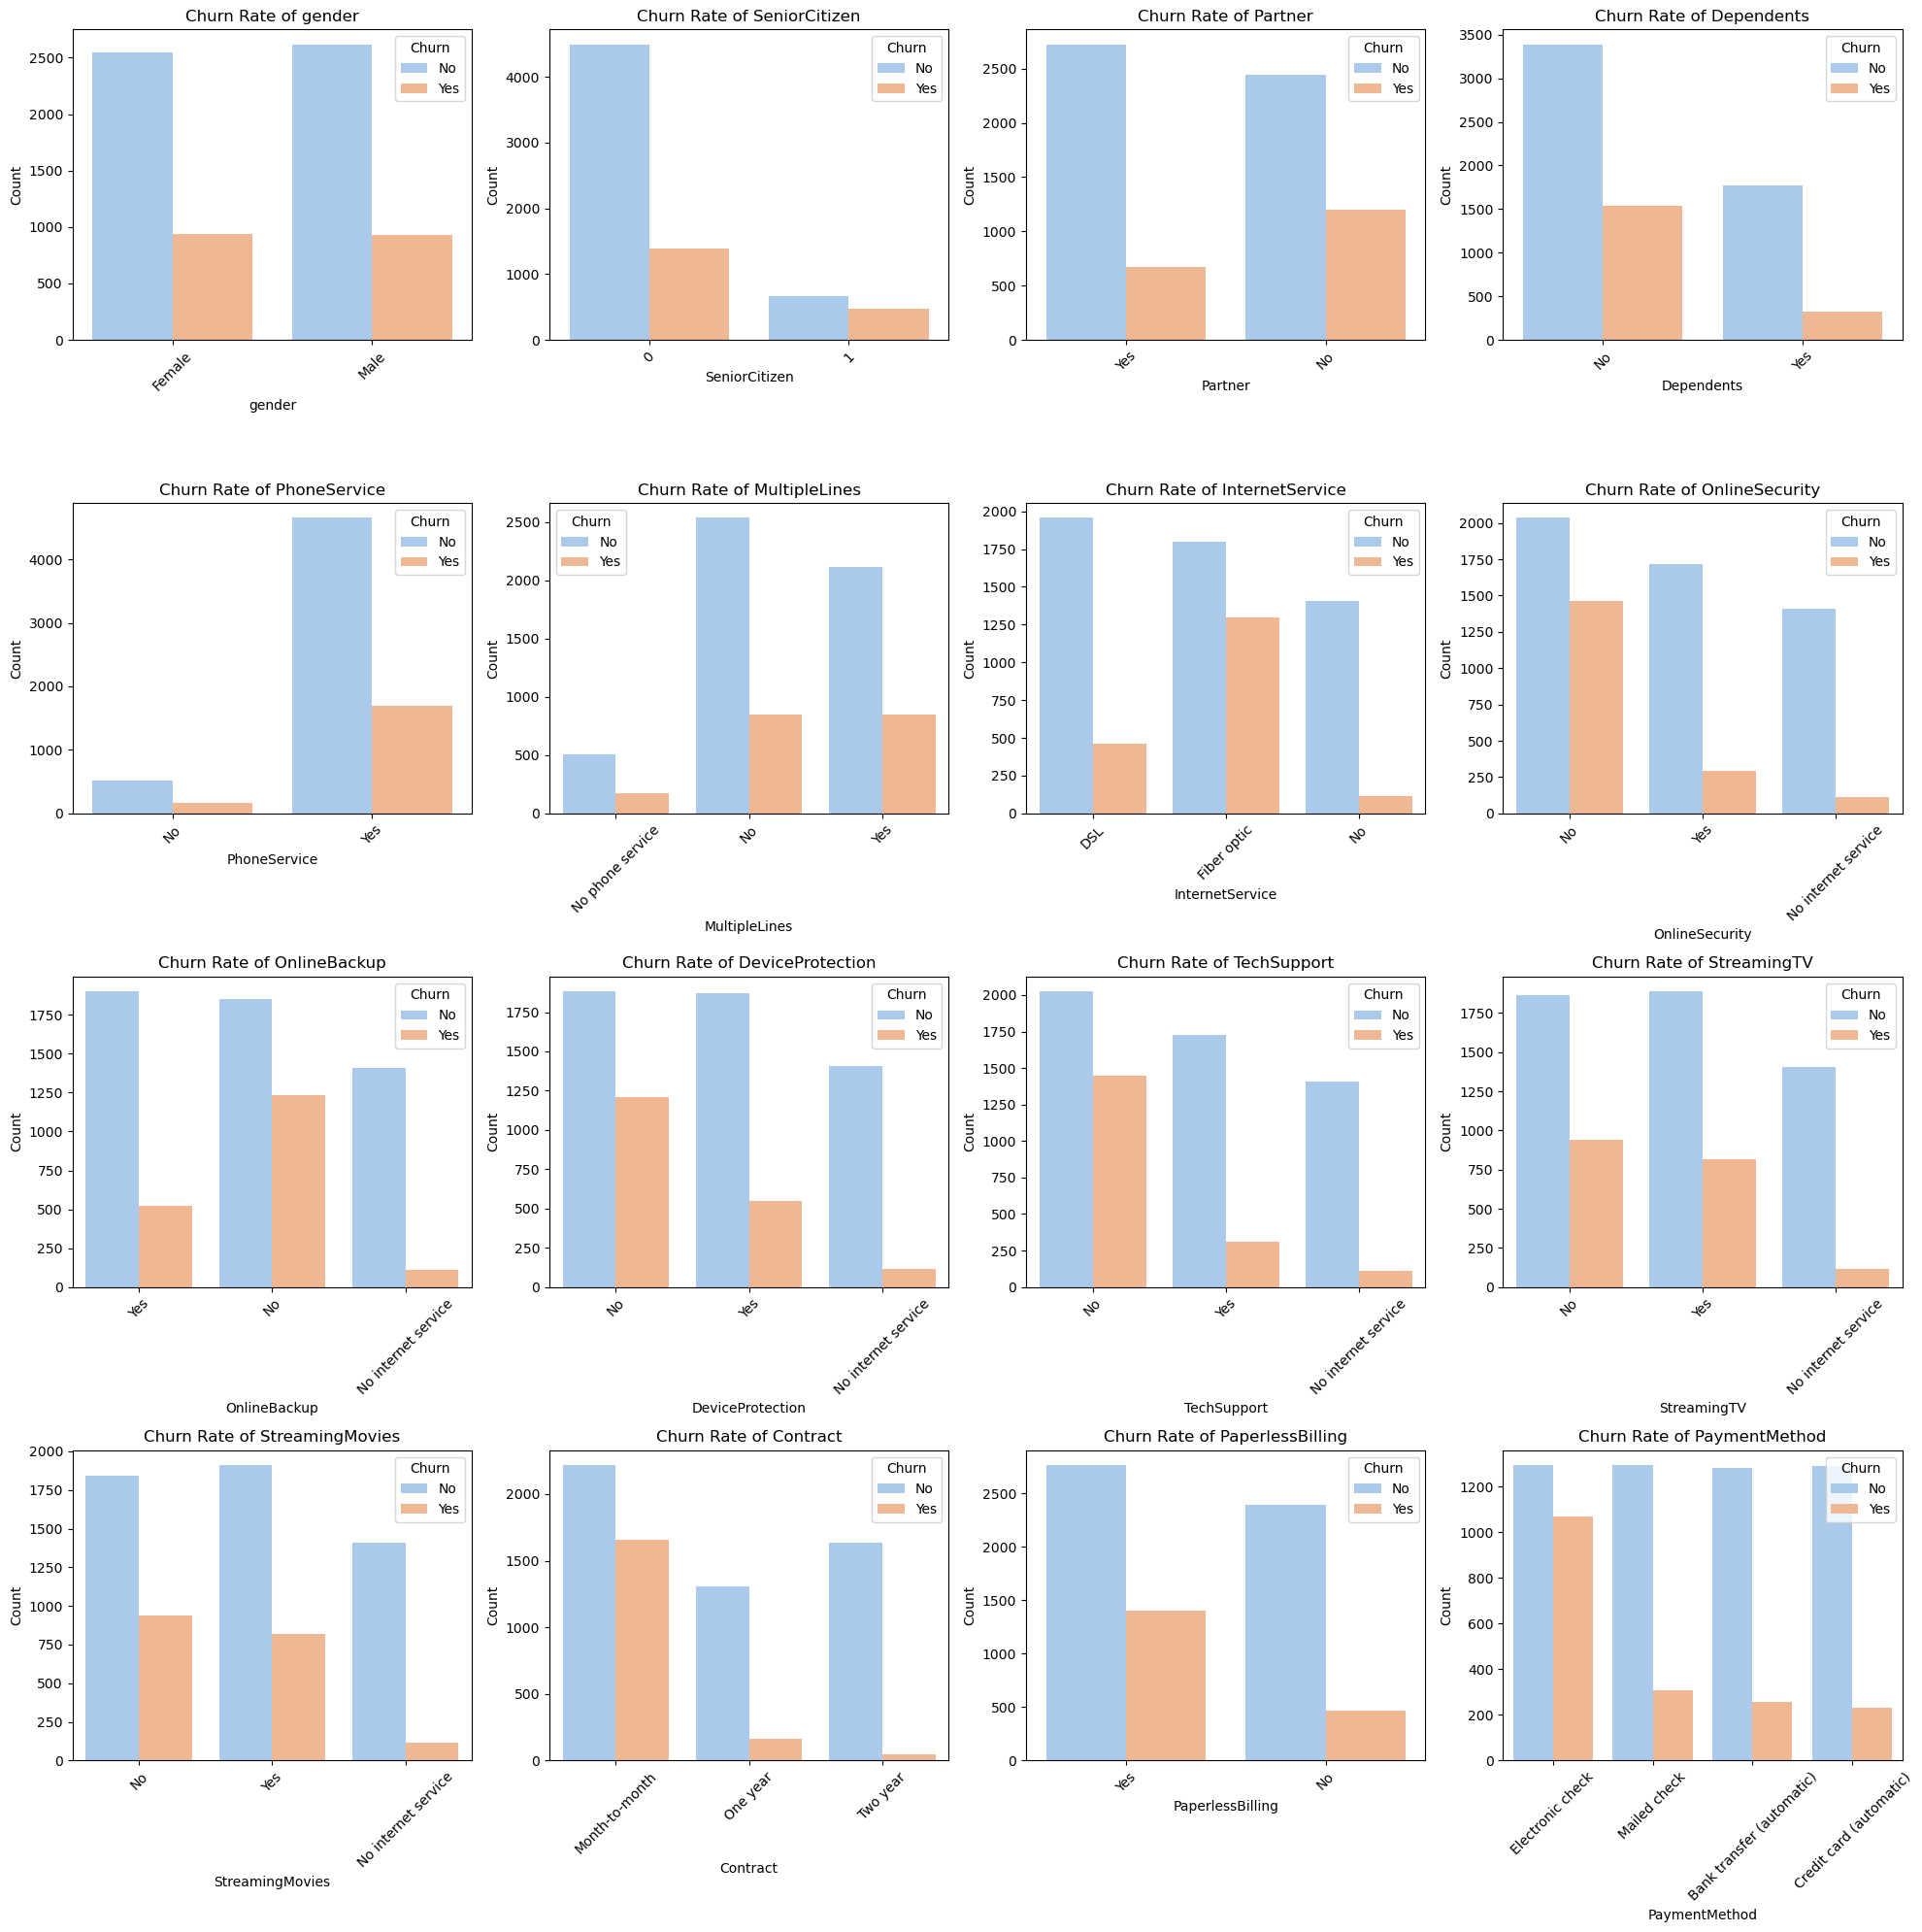

In [14]:
fig, axes = plt.subplots(4,4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, hue ='Churn', ax=axes[i], palette='pastel')
    axes[i].set_title(f"Churn Rate of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_20/1236552511.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1236552511.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


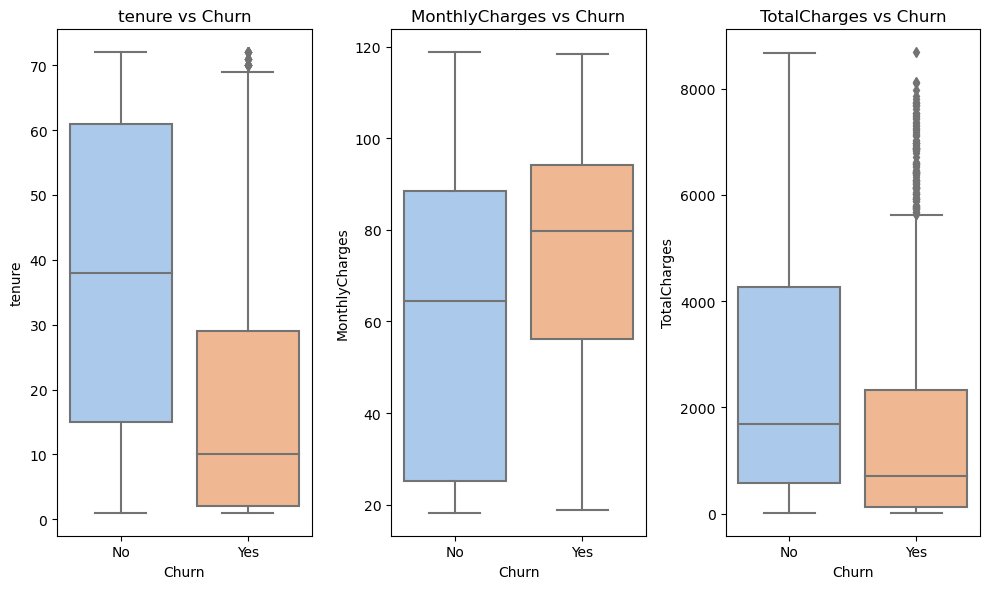

In [15]:
numerical_cols = ['tenure', 'MonthlyCharges','TotalCharges']

plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

Attrited customers have median tenure less than other customers . 
Attrited Customers have higher Median Monthly Charges <br>
And it doesn't look like we have outliers 

**Encoding the categorical variables**

In [16]:
df1 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df1 = pd.get_dummies(df1, columns = ['Churn'], drop_first = True,)
df1.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

/tmp/ipykernel_20/1786543902.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [17]:
df1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [18]:
df1 = df1.drop(columns=['customerID'])

**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.064303,-0.260878,-0.173740,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.239504,-0.363923,-0.959649,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.512486,-0.747850,-0.195248,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [20]:
df1.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [21]:
categorical_columns = ['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 
                       'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 
                       'InternetService_Fiber optic', 'InternetService_No',
                       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 
                       'OnlineBackup_No internet service', 'OnlineBackup_Yes', 
                       'DeviceProtection_No internet service', 'DeviceProtection_Yes', 
                       'TechSupport_No internet service', 'TechSupport_Yes', 
                       'StreamingTV_No internet service', 'StreamingTV_Yes', 
                       'StreamingMovies_No internet service', 
                       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 
                       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 
                       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [22]:
len(categorical_columns)

27

In [23]:
from scipy.stats import chi2_contingency

cat_col = []
for col in categorical_columns:
    contingency_table = pd.crosstab(df1['Churn'], df1[col])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-Squared Statistic for {col}: {chi2_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.01:
        print("Keep the feature")
        cat_col.append(col)
    else:
        print("Remove the feature")


Chi-Squared Statistic for gender_Male: 0.47545453727386294
P-value: 0.4904884707065509
Remove the feature

Chi-Squared Statistic for SeniorCitizen_1: 158.4408162893713
P-value: 2.4792557203954705e-36
Keep the feature

Chi-Squared Statistic for Partner_Yes: 157.50315146557506
P-value: 3.97379757451591e-36
Keep the feature

Chi-Squared Statistic for Dependents_Yes: 186.32163933855873
P-value: 2.0196592017051303e-42
Keep the feature

Chi-Squared Statistic for PhoneService_Yes: 0.8737327674431736
P-value: 0.34992398942431924
Remove the feature

Chi-Squared Statistic for MultipleLines_No phone service: 0.8737327674431736
P-value: 0.34992398942431924
Remove the feature

Chi-Squared Statistic for MultipleLines_Yes: 11.08687591455858
P-value: 0.0008694082815826175
Keep the feature

Chi-Squared Statistic for InternetService_Fiber optic: 663.3564569173802
P-value: 2.782210278669653e-146
Keep the feature

Chi-Squared Statistic for InternetService_No: 362.94784884289265
P-value: 6.422520797907203

In [24]:
cat_col

['SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [25]:
X = df1.drop(columns=["Churn"])
y = df1["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)

In [26]:
print(y_train.value_counts())
y_test.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64


0    1033
1     374
Name: Churn, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X1_train, y1_train = smote.fit_resample(X_train, y_train)

y1_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [28]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(DecisionTreeClassifier(random_state = 42), n_features_to_select = 10)
X2_train = rfe.fit_transform(X1_train, y1_train)      # numpy array of X_train containing only 10 features
selected_features = X1_train.columns[rfe.support_]   # numpy array containing features 

In [29]:
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Partner_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'Contract_One year', 'Contract_Two year'],
      dtype='object')


In [30]:
X1_test = X_test[selected_features]

## Modelling 

In [31]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

def fit_model(model, params, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
    grid_search = GridSearchCV(model, param_grid=params, scoring='average_precision', cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc,confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
     # AUROC Score
    auroc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUROC Score: {auroc:.4f}")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    # AUROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


logreg_params = {'C': [0.001, 0.01, 0.1, 1]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]}
rf_params = {'n_estimators': [50, 100] , 'max_depth': [None, 10, 20]}
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}


In [34]:
logreg_model = fit_model(LogisticRegression(random_state = 42), logreg_params, X2_train, y1_train)
dt_model = fit_model(DecisionTreeClassifier(random_state = 42), dt_params, X2_train, y1_train)
rf_model = fit_model(RandomForestClassifier(random_state = 42), rf_params, X2_train, y1_train)
knn_model = fit_model(KNeighborsClassifier(), knn_params, X2_train, y1_train)
svc_model = fit_model(SVC(probability = True, random_state = 42), svc_params, X1_train, y1_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Logistic Regression:
AUROC Score: 0.8152

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


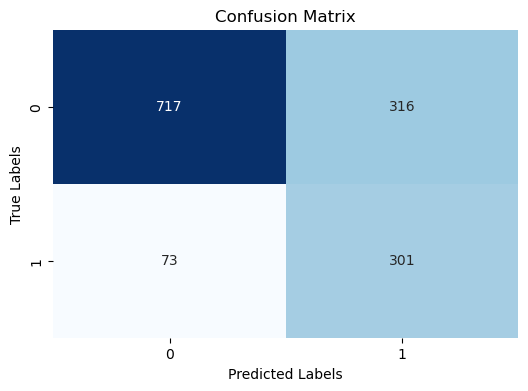

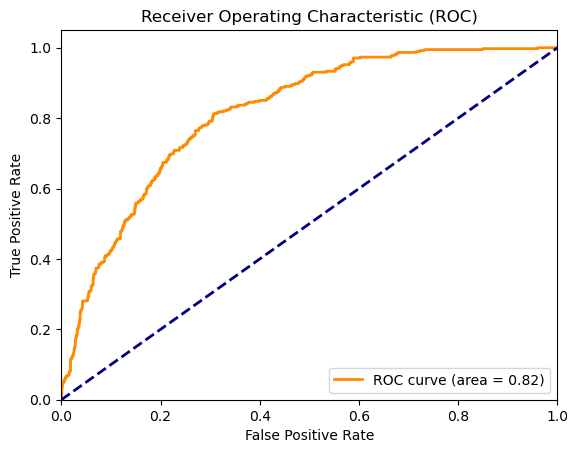

Decision Tree Classifier:
AUROC Score: 0.7588

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1033
           1       0.48      0.72      0.57       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.77      0.72      0.73      1407



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


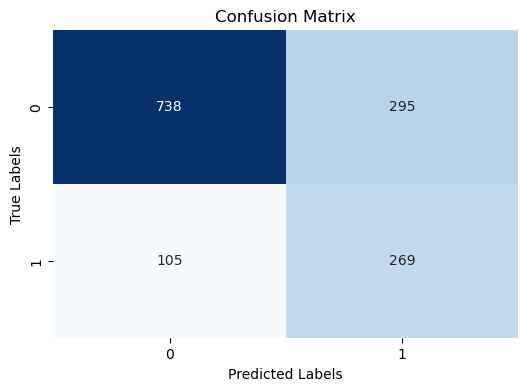

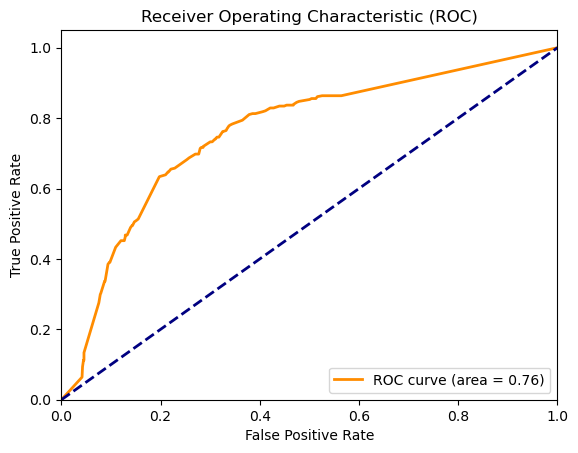

Random Forest Classifier:
AUROC Score: 0.8181

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


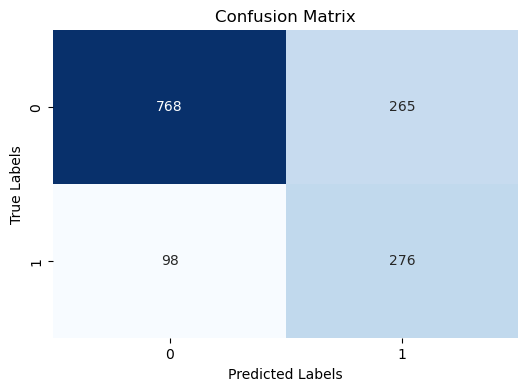

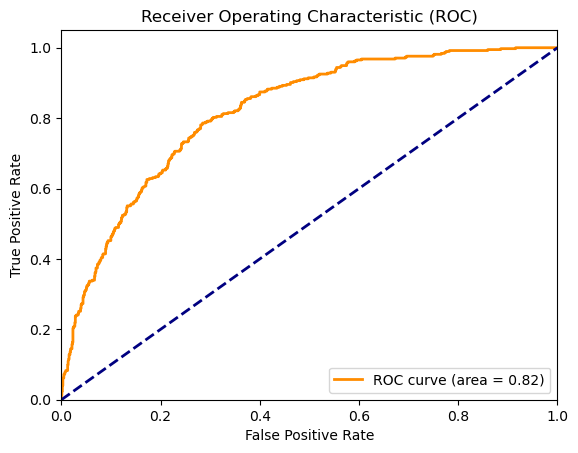

Support Vector Classifier:
AUROC Score: 0.8258

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.74      0.76      1407



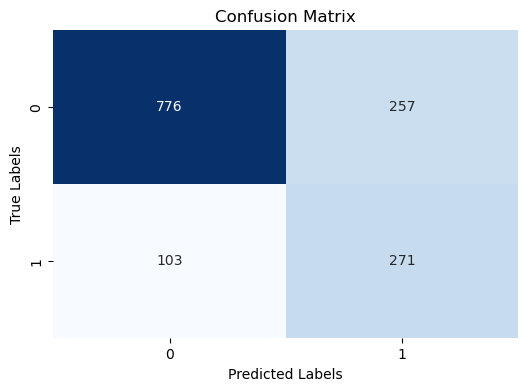

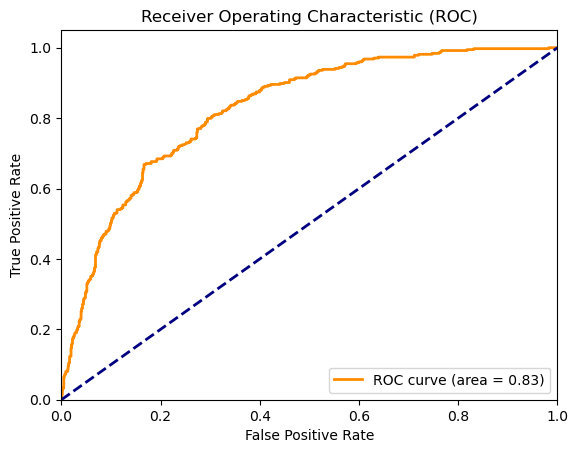

K-Nearest Neighbors Classifier:
AUROC Score: 0.7647

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1033
           1       0.47      0.67      0.55       374

    accuracy                           0.71      1407
   macro avg       0.66      0.70      0.67      1407
weighted avg       0.76      0.71      0.73      1407



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


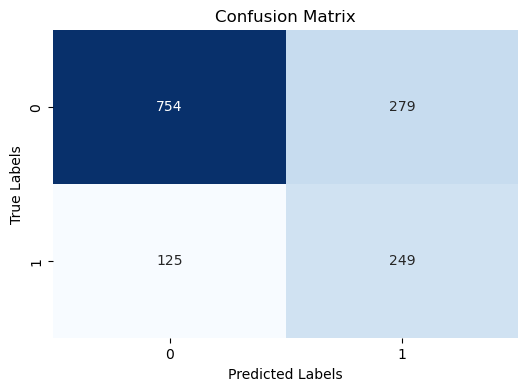

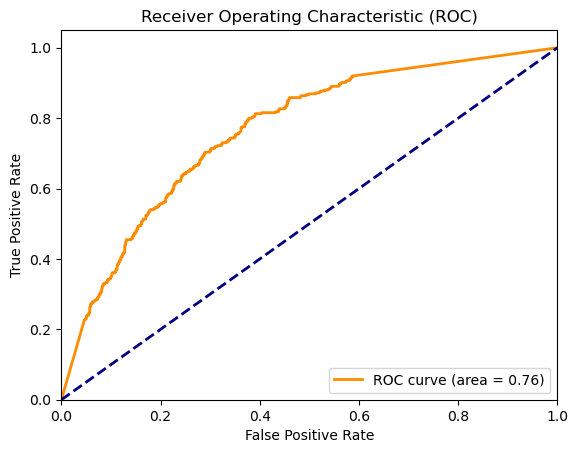

In [35]:
print("Logistic Regression:")
logreg_results = evaluate_model(logreg_model, X1_test, y_test)

print("Decision Tree Classifier:")
dt_results = evaluate_model(dt_model, X1_test, y_test)

print("Random Forest Classifier:")
rf_results = evaluate_model(rf_model, X1_test, y_test)

print("Support Vector Classifier:")
svc_results = evaluate_model(svc_model, X_test, y_test)

print("K-Nearest Neighbors Classifier:")
knn_results = evaluate_model(knn_model, X1_test, y_test)

Overall, the gradient boosting model performs the best among the tested models, followed closely by logistic regression and random forest. These models exhibit better predictive capability for churn prediction, as indicated by higher AUROC scores and reasonable precision-recall balance.

In the context of a telecom customer churn problem, recall for class 1 (churn) is often more important because it represents the ability of the model to correctly identify customers who are likely to churn. <br>
<h2>Model Performance - Recall for Churn (Class 1)</h2>
<table style="width:100%; border: 1px solid black;">
  <tr style="background-color: #f2f2f2;">
    <th>Model</th>
    <th>AUROC_Score</th>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.82</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>K-Nearest Neighbour</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.75</td>
  </tr>
</table>


## Conclusion 
In this telecom customer churn prediction project, we aimed to build models to identify customers at risk of churning. We explored the data, conducted exploratory data analysis (EDA), and performed feature selection. After fitting several models, we found that the gradient boosting model demonstrated the best performance, achieving the highest recall for churn (class 1). Maximizing recall is crucial for identifying customers who are likely to churn, allowing the telecom company to take proactive measures to retain them. The models' predictive capability will aid the company in making informed decisions to reduce churn, enhance customer satisfaction, and improve business profitability.




